In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/refs/heads/master/HR_dataset.csv")

#EDA

In [3]:
# prompt: perform EDA on df

df.head()
df.info()
df.describe()
# Check for missing values
df.isnull().sum()
# Explore categorical features
for column in df.select_dtypes(include=['object']):
  print(f"\nColumn: {column}")
  print(df[column].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   names                  15000 non-null  object 
 1   satisfaction_level     15000 non-null  float64
 2   last_evaluation        15000 non-null  float64
 3   number_project         15000 non-null  int64  
 4   average_monthly_hours  15000 non-null  int64  
 5   exp_in_company         15000 non-null  int64  
 6   work_accident          15000 non-null  int64  
 7   left                   15000 non-null  int64  
 8   promotion_last_5years  15000 non-null  int64  
 9   role                   15000 non-null  object 
 10  salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB

Column: names
names
James Brown         7
Robert Smith        5
James Wilson        4
Michael Williams    4
William Smith       4
                   ..


In [4]:
# prompt: correlation matrix for df numerical only

correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)


                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105077       -0.142908   
last_evaluation                  0.105077         1.000000        0.349380   
number_project                  -0.142908         0.349380        1.000000   
average_monthly_hours           -0.020013         0.339770        0.417232   
exp_in_company                  -0.100803         0.131658        0.196839   
work_accident                    0.058673        -0.007135       -0.004767   
left                            -0.388225         0.006701        0.023900   
promotion_last_5years            0.025596        -0.008695       -0.006073   

                       average_monthly_hours  exp_in_company  work_accident  \
satisfaction_level                 -0.020013       -0.100803       0.058673   
last_evaluation                     0.339770        0.131658      -0.007135   
number_project                      0.417232        0.196839

In [5]:
print(df['salary'].value_counts())

salary
low       7317
medium    6446
high      1237
Name: count, dtype: int64


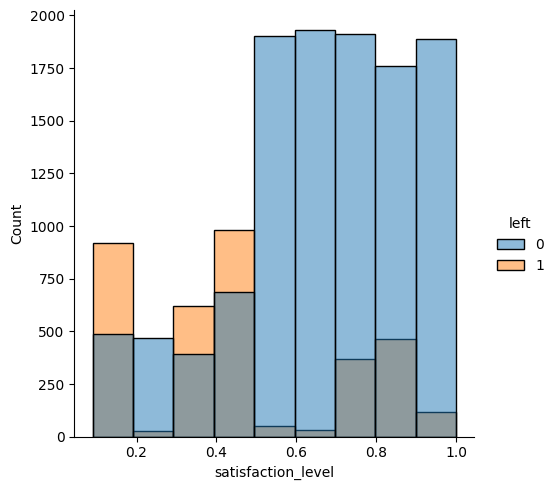

In [8]:
import seaborn as sns
sns.displot(data=df, x="satisfaction_level", binwidth=0.1, hue='left')

#prepare data for ML

1st step: training

In [9]:
df

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
0,Jessica Stroud,0.38,0.53,2,157,3,0,1,0,sales,low
1,Daryl Fields,0.80,0.86,5,262,6,0,1,0,sales,medium
2,Daisy Anderson,0.11,0.88,7,272,4,0,1,0,sales,medium
3,Joseph Fernandez,0.72,0.87,5,223,5,0,1,0,sales,low
4,Herbert Moore,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14995,Roger King,0.37,0.48,2,160,3,0,1,0,support,low
14996,Ora Lyles,0.37,0.53,2,143,3,0,1,0,support,low
14997,Steven Freedman,0.11,0.96,6,280,4,0,1,0,support,low
14998,Randall Williams,0.37,0.52,2,158,3,0,1,0,support,low


In [10]:
inputs = ["satisfaction_level"]
target = "left"

# prepare training data
X=df[inputs]
y=df[target]

In [11]:
# pick a model - K nearest neighbour
# sklearn is sci-learn, a machin learning library for python
# k is an arbitary number we chose

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(),

In [12]:
# prepare our dataset, sdplit into training and testing
# dataset train-test split 80/20
# 20% to check the validity of model
# randome state = to start the start; everybody start from 42, output will always be same like constant, result will be samewe.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [15]:
# prompt: fit the training data into KNN model

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# calculate the accuracy score of our model with the testing data

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# show in percentage
print(f"Accuracy: {accuracy*100}%")

Accuracy: 0.869
Accuracy: 86.9%


In [17]:
# force positive, force negative

In [18]:
# prompt: predict the left of an employee with satisfaction level of 0.3, remove warnings, print stay if 0, resigned if 1

import warnings
warnings.filterwarnings("ignore")

satisfaction_level = 0.1
prediction = model.predict([[satisfaction_level]])

if prediction == 0:
  print("Stay")
else:
  print("Resigned")


Resigned


In [24]:
inputs = ["number_project"]
target = "left"

# prepare training data
X=df[inputs]
y=df[target]

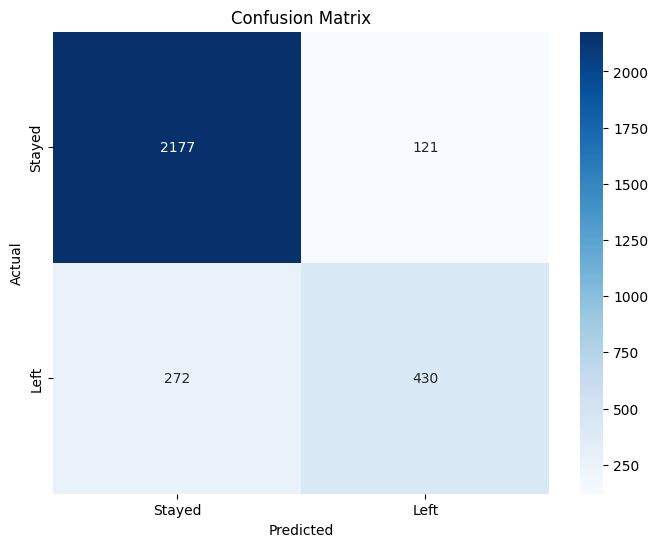

In [25]:
# prompt: show the confusion matrix with proper labelling

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

precision: proportion of the two positives to the amount of total positives that the model predicts
- Q: Out of all the positive predictions we made, how many were true?
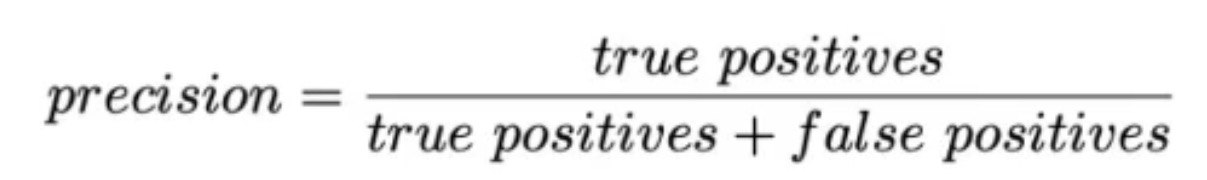

In [26]:
# prompt: calculate the precision

from sklearn.metrics import precision_score

# Assuming y_test and y_pred are already defined from your previous code

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.7803992740471869


recall: how good the model is at finding ll the positives. recall is also called true positive rate
- Q : Out of all the data points that should be predicted as true, how many did we correctly predict as true?
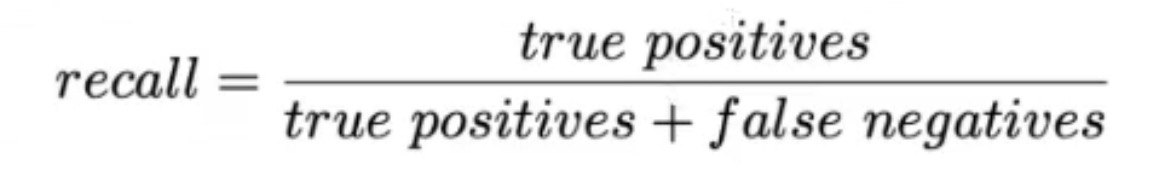

In [27]:
# prompt: calculate the recall

from sklearn.metrics import recall_score

# Assuming y_test and y_pred are already defined from your previous code

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Recall: 0.6125356125356125


In [28]:
# prompt: calculate speciality and sensitivity

from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your previous code

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity}")

Specificity: 0.9473455178416014
Sensitivity: 0.6125356125356125


Confusion Matrix
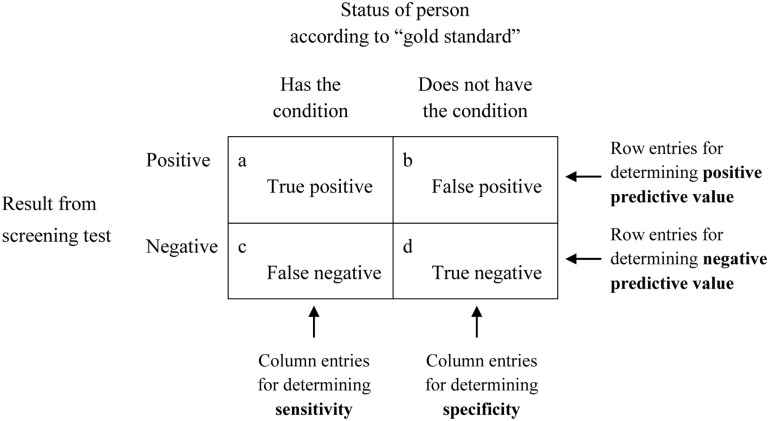